# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
#url = "https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data"
!kaggle datasets download -d henriqueyamahata/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
bank-marketing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/bank-marketing.zip

Archive:  /content/bank-marketing.zip
replace bank-additional-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df=pd.read_csv("/content/bank-additional-full.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df['pdays']=df['pdays'].apply( lambda x : -1 if x == 999 else x)

## Taking 'Unknown', 'NonExistent' as a Label

In [ ]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [ ]:
df['job'].mode()

0    admin.
Name: job, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

## Removing duplicates
We can use .drop_duplicates()

In [ ]:
df.duplicated().sum()
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

## Converting data types
Using .astype()

In [ ]:
df[['y','education','job','marital','default','housing','loan','contact','month','day_of_week','poutcome']]=df[['y','education','job','marital','default','housing','loan','contact','month','day_of_week','poutcome']].astype('category')

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

<Axes: >

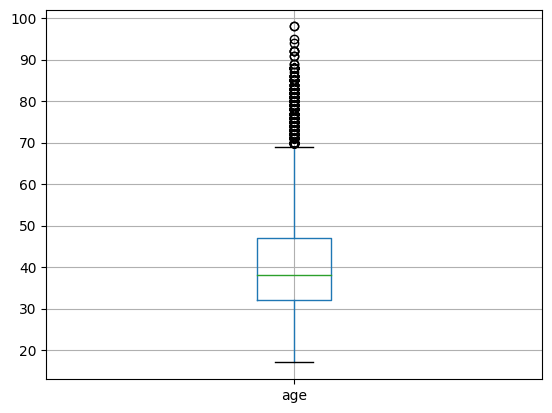

In [ ]:
df[['age']].boxplot()

<Axes: >

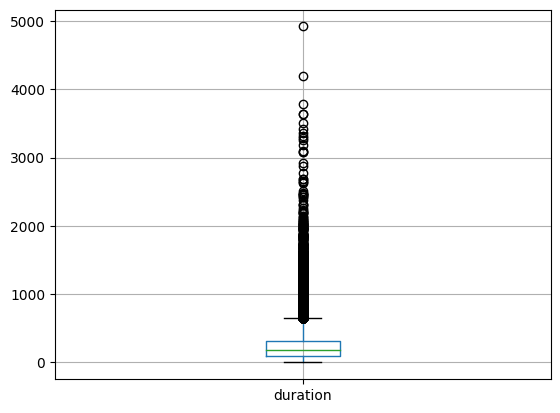

In [ ]:
df[['duration']].boxplot()

<Axes: >

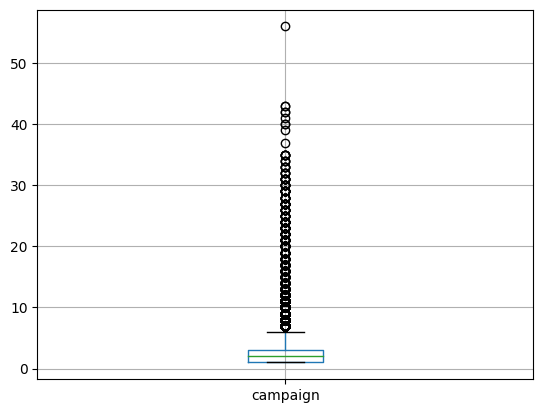

In [ ]:
df[['campaign']].boxplot()w

##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [ ]:
df[['y','education','job','marital','default','housing','loan','contact','month','day_of_week','poutcome']]=df[['y','education','job','marital','default','housing','loan','contact','month','day_of_week','poutcome']].astype('category')

## Encoding categorical variables


In [ ]:
df = pd.get_dummies(df, columns=['education','job','marital','default','housing','loan','contact','month','day_of_week','poutcome'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])


In [ ]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


# Data Visualization


## Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

In [ ]:
plt.hist(df['y'])

In [ ]:
plt.hist(df['housing'])

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

<Axes: >

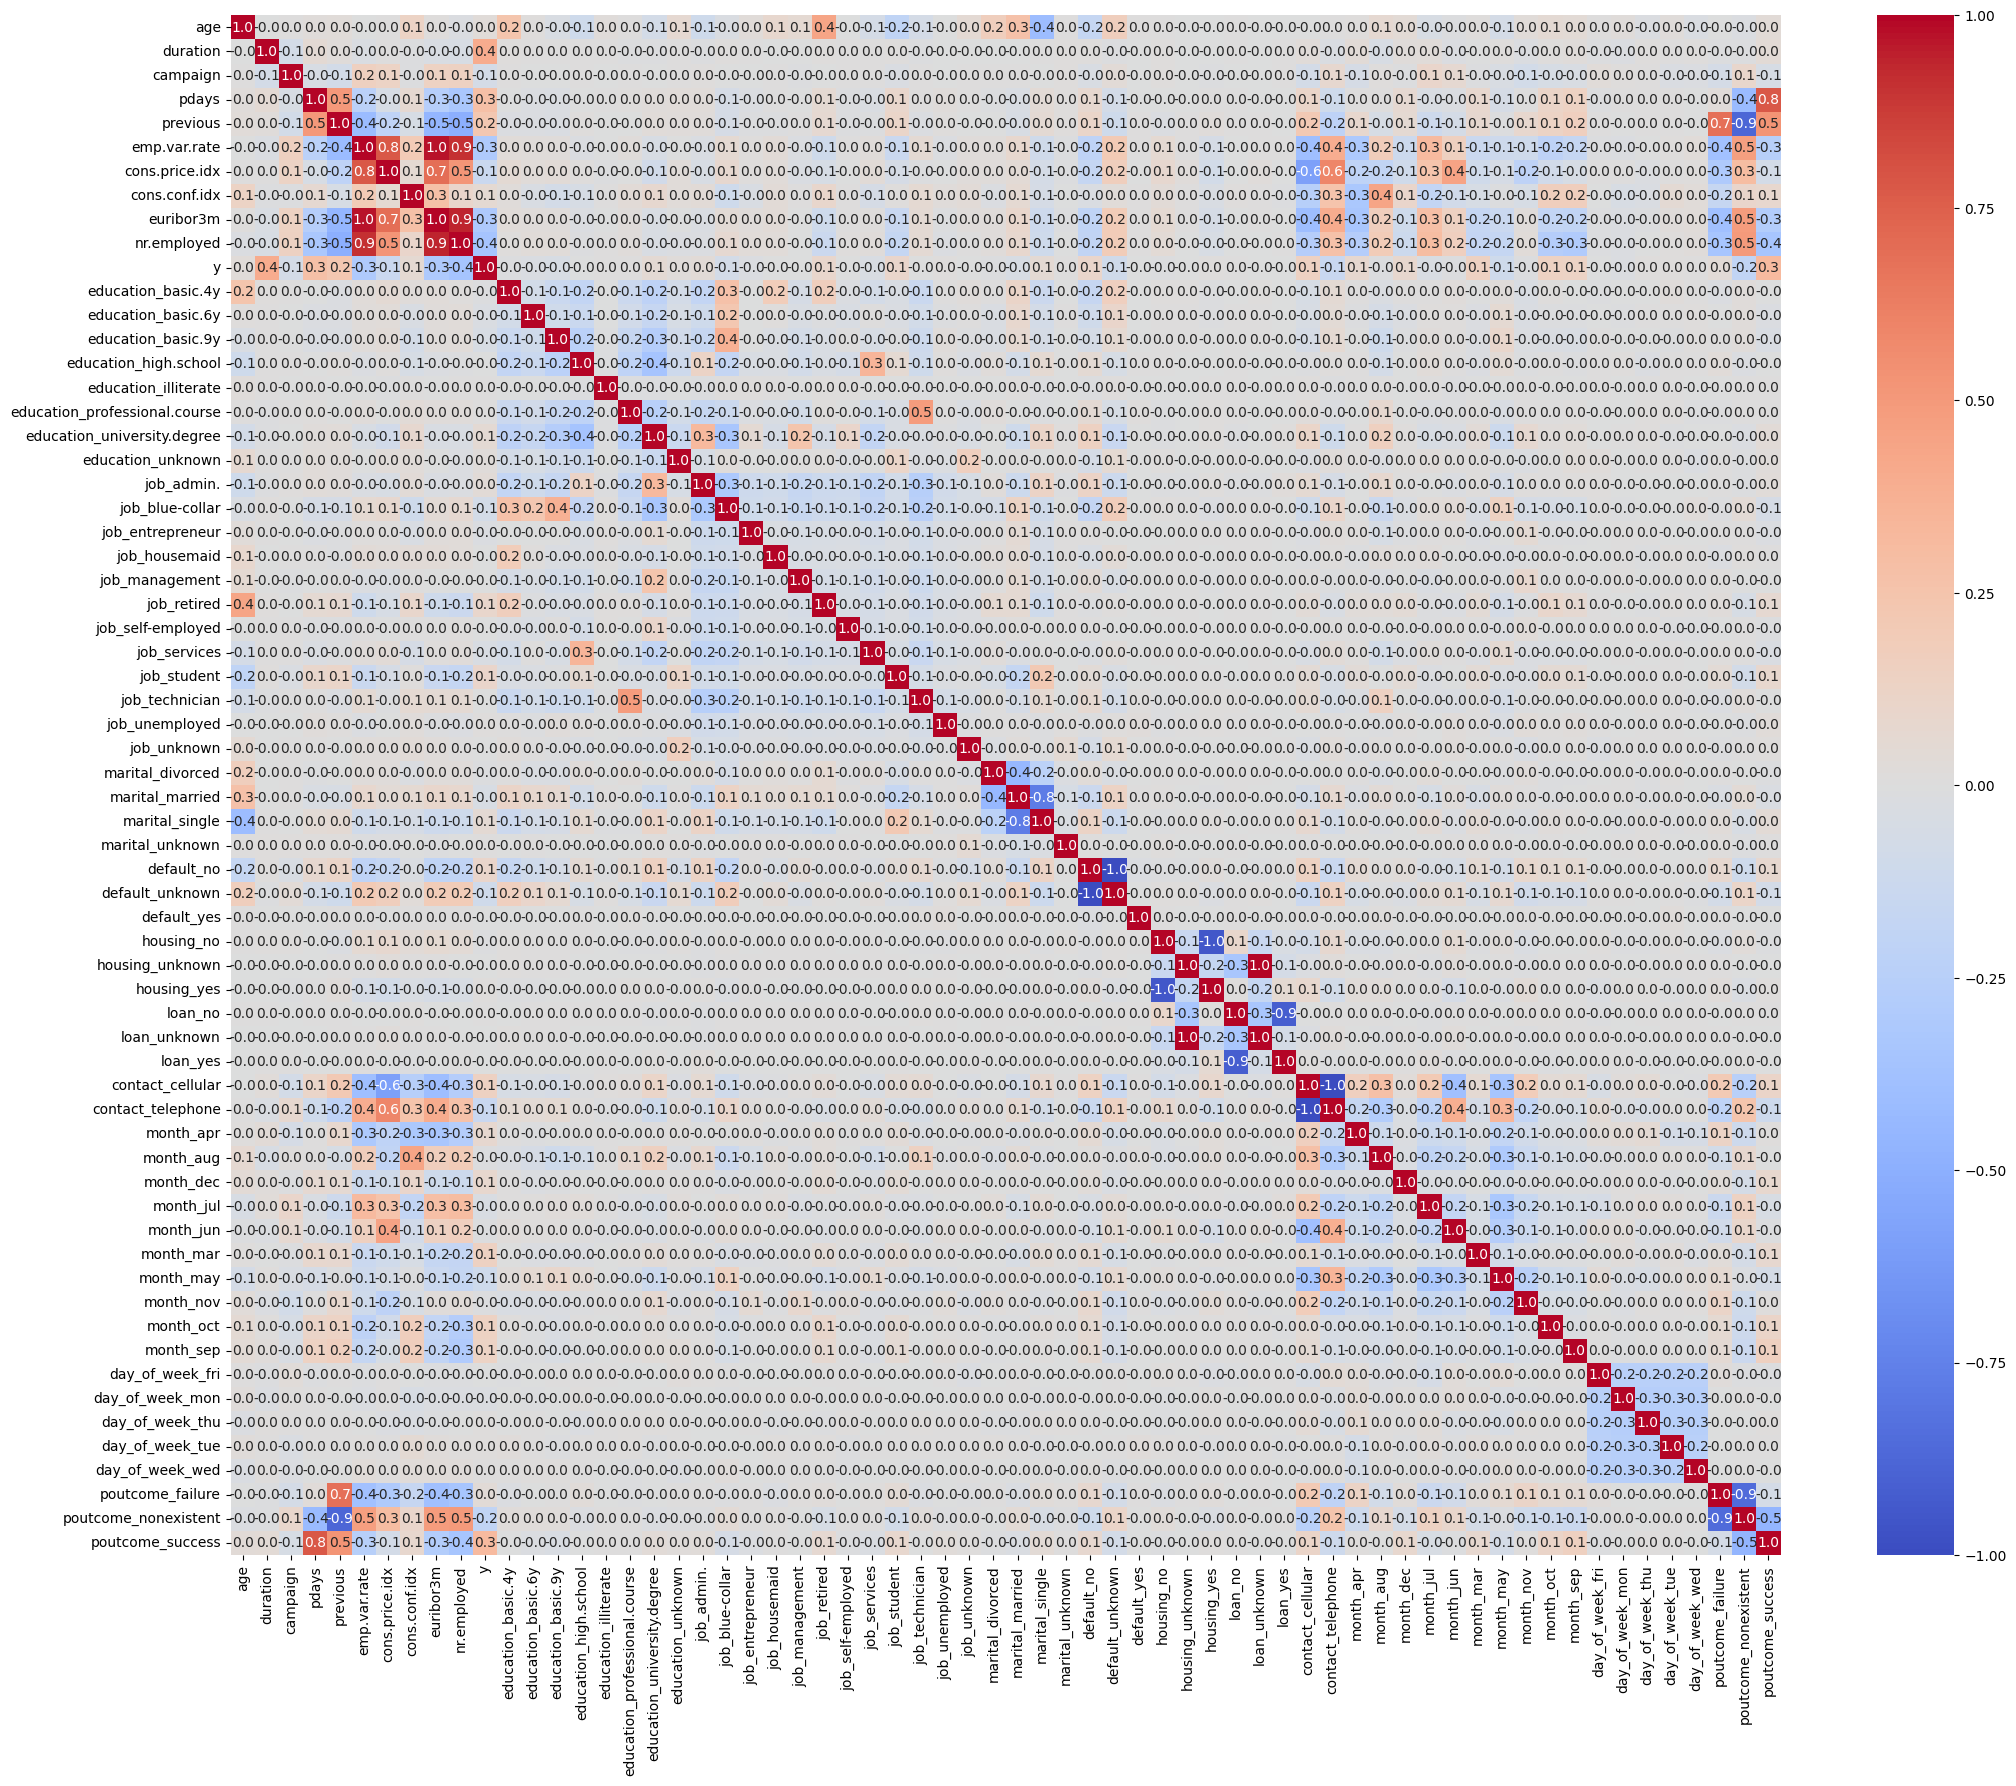

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='0.1f')

In [ ]:
df=df.drop(['previous','emp.var.rate','euribor3m','nr.employed','housing_unknown','Pdays'],axis=1)

<Axes: >

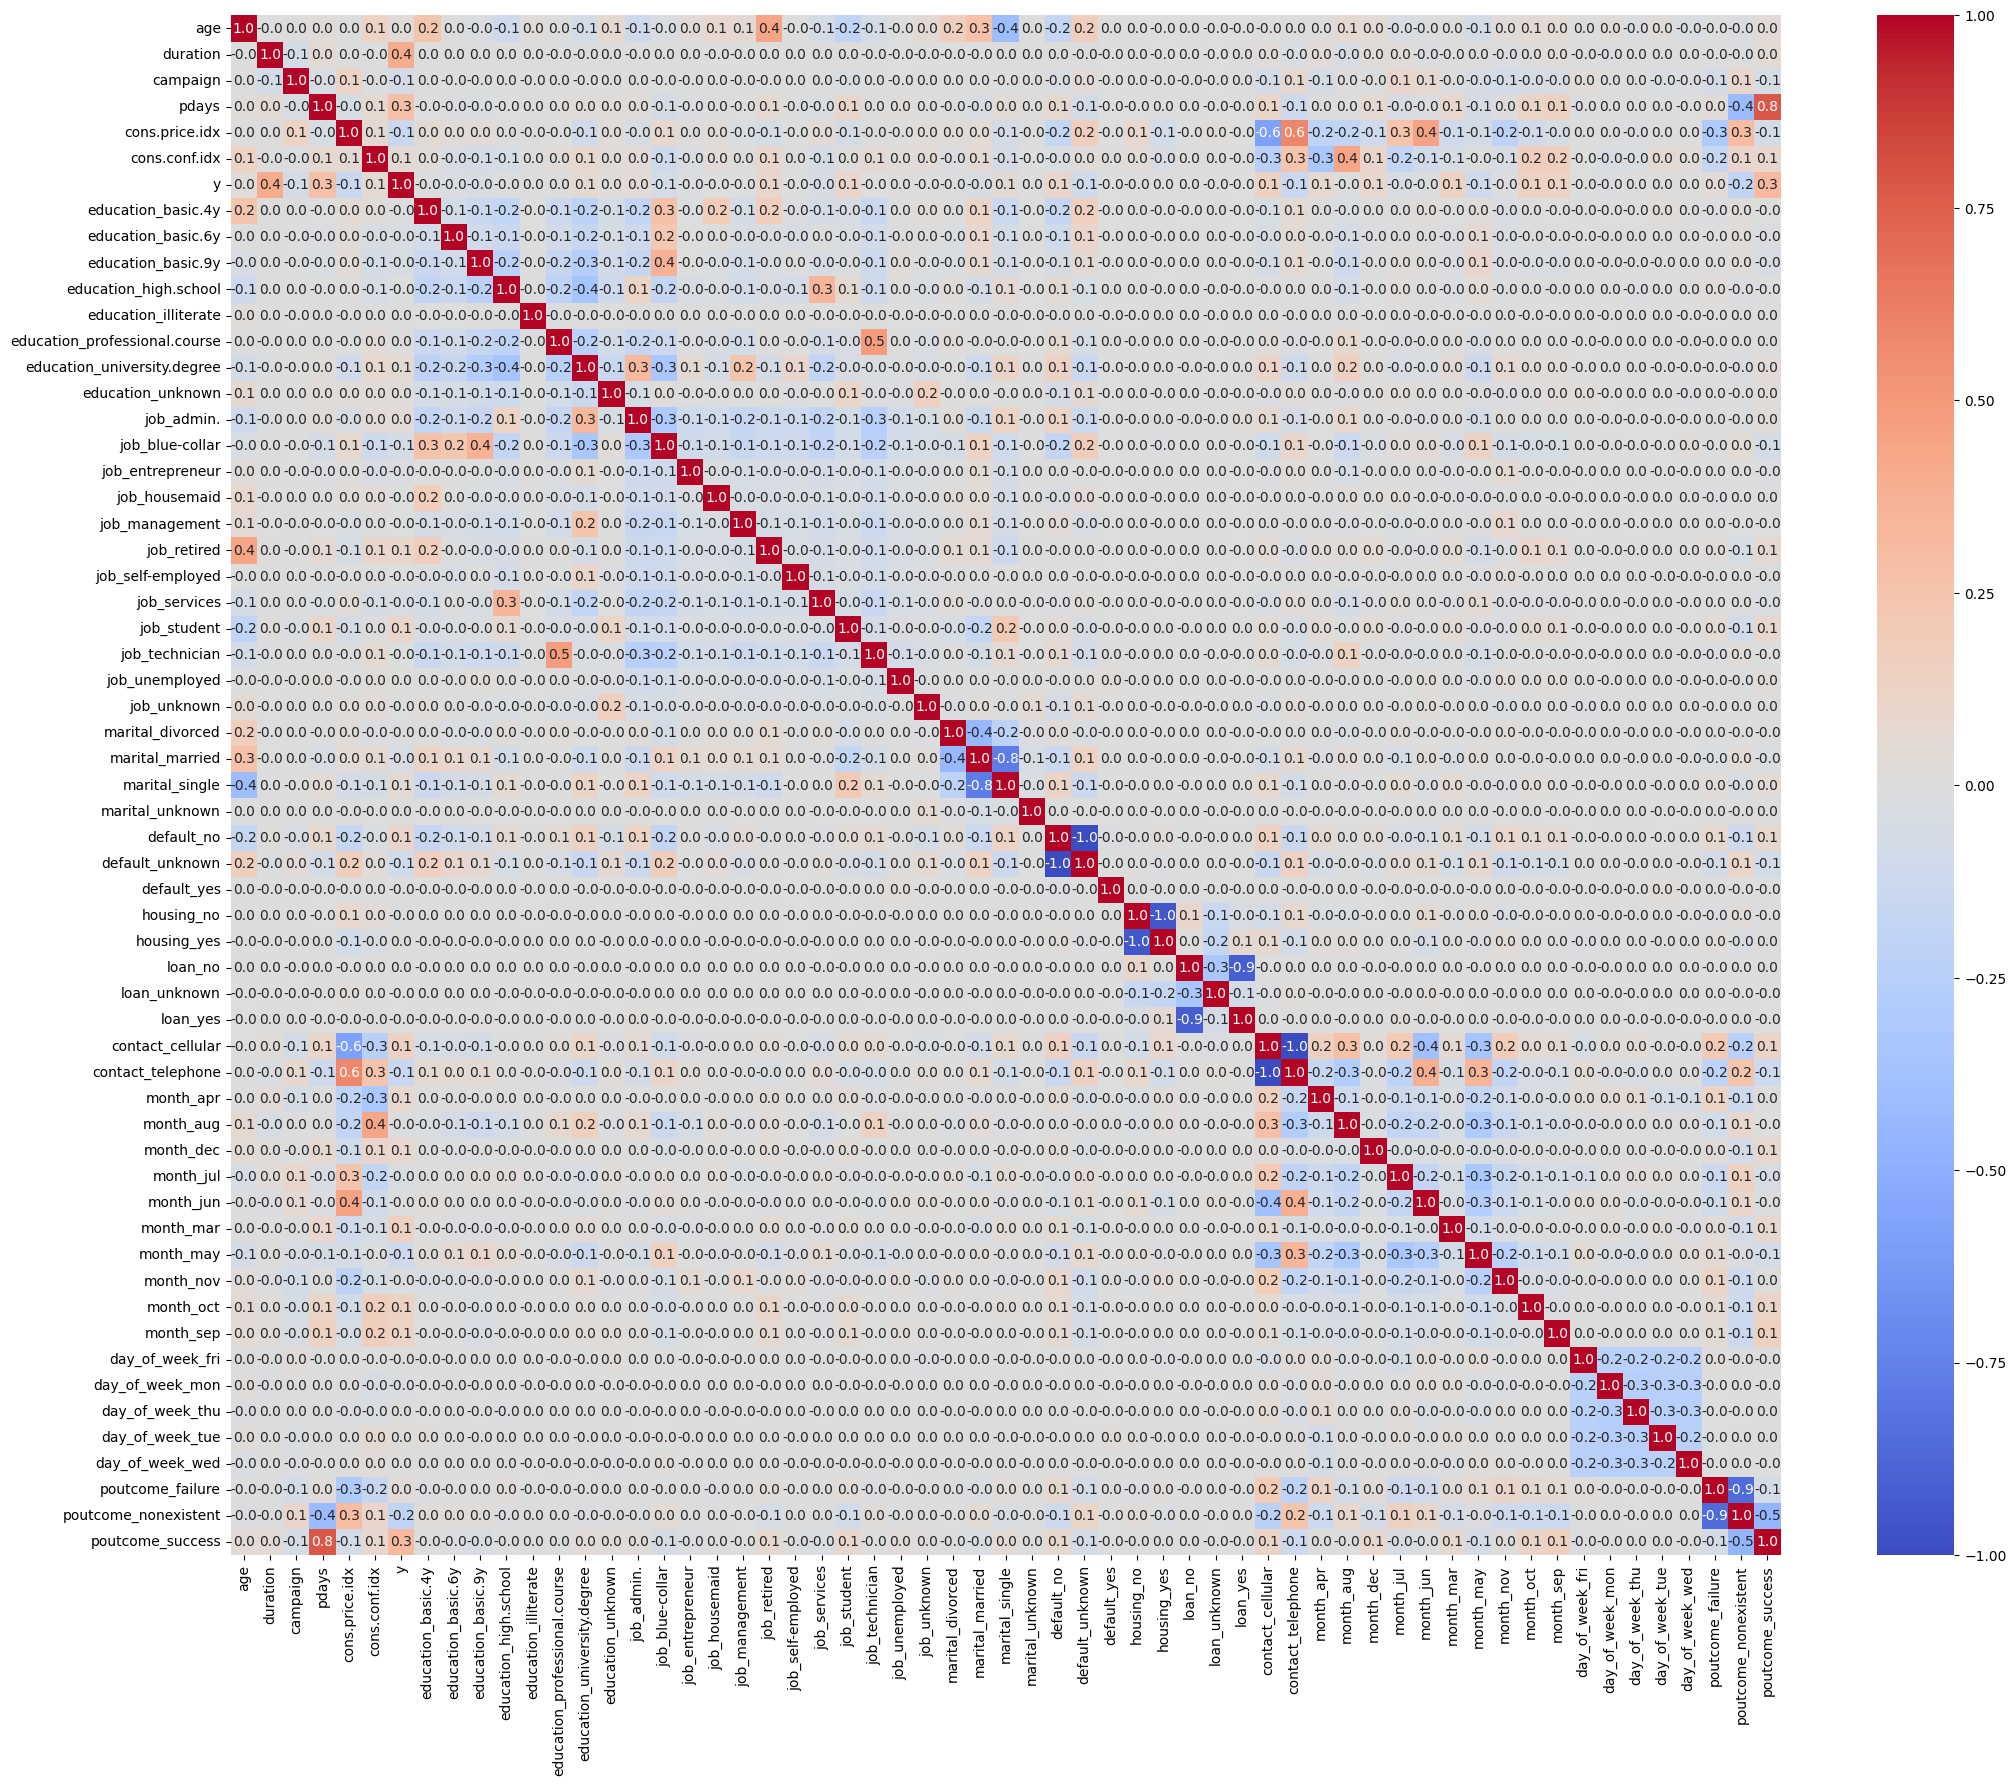

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='0.1f')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
features= df.drop('y',axis=1)
target=df['y'].copy()

In [ ]:
SVM_model=SVC(kernel='rbf')
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,shuffle=True)
SVM_model.fit(x_train, y_train)
print(classification_report(SVM_model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7927
           1       0.19      0.59      0.28       309

    accuracy                           0.89      8236
   macro avg       0.58      0.74      0.61      8236
weighted avg       0.95      0.89      0.92      8236



(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

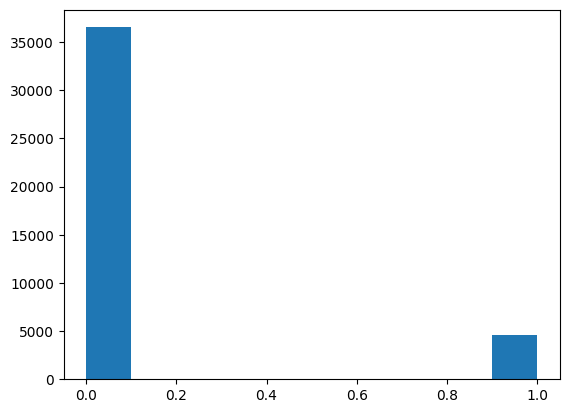

In [ ]:
y=0